## **Softmax Regression on MNIST**

The objective of this notebook is to demonstrate **softmax regression in classification task**. 

We make use of **MNIST** dataset for multiclass classification of images into digits they represent.

#### **Importing Libraries**

In [1]:
# Common imports 
import numpy as np
from pprint import pprint  

# to make this notebook's output stable across runs
np.random.seed(42) 

# sklearn specific imports 
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.pipeline import make_pipeline ,Pipeline
from sklearn.dummy import DummyClassifier 
from sklearn.linear_model  import SGDClassifier, RidgeClassifier, LogisticRegression ,LogisticRegressionCV
from sklearn.model_selection import cross_validate, RandomizedSearchCV, cross_val_predict 

# log loss is also known as cross entropy loss
from sklearn.metrics import log_loss 
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import precision_score, recall_score, classification_report 
from sklearn.metrics import precision_recall_curve ,make_scorer ,f1_score
from sklearn.metrics import roc_curve, roc_auc_score 

#scipy 
from scipy.stats import loguniform 

# To plot pretty figures 
%matplotlib inline 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns;sns.set()

# global settings 
mpl.rc('axes',labelsize=14) 
mpl.rc('xtick',labelsize=12) 
mpl.rc('ytick',labelsize=12) 
mpl.rc('figure',figsize=(8,6))

import warnings 
warnings.filterwarnings('ignore')

#### **Data Loading**

In [2]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

It returns the data and labels as a panda dataframe.

#### **Data Splitting**

In [3]:
X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### **Model Building**

We scale the input features with `StandardScaler` and use `LogisticRegression` estimator with multi_class parameter set to `multinomial` and using `sag` solver.

In [4]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('logreg',LogisticRegression(multi_class='multinomial',solver='sag'))]) 
                 
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(multi_class='multinomial', solver='sag'))])

In [5]:
pipe.score(X_train,y_train)

0.9305833333333333

In [6]:
pipe.score(X_test,y_test)

0.9249

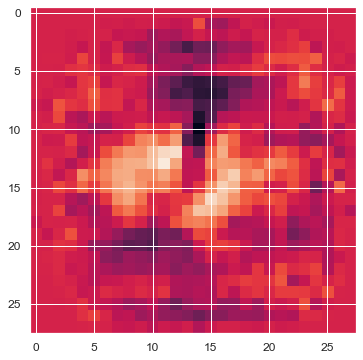

In [7]:
image = pipe[-1].coef_[4].reshape(28, 28)
plt.imshow(image)

After training the model with the training feature matrix and labels, we learn the model parameters.

In [8]:
pipe[-1].coef_.shape

(10, 784)

In [9]:
pipe[-1].intercept_.shape

(10,)

In [10]:
pipe[-1].classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

#### **Model Evaluation**

In [11]:
print(classification_report(y_test ,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.93      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Most of the classses have `f1_score` greater than 90%, which is considered to be a good f1_score.

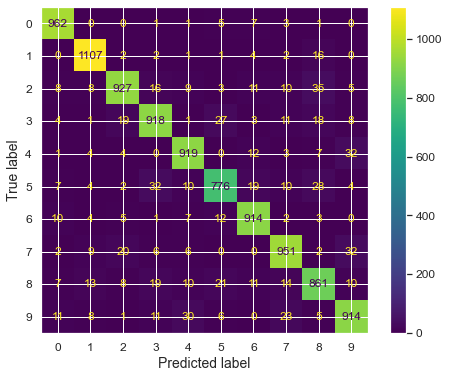

In [12]:
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)
plt.show()

### **Using LogisticRegressionCV**

In [13]:
X_tr, X_te, y_tr, y_te = X[:10000], X[10000:10500], y[:10000], y[10000:10500]

In [14]:
scorer = make_scorer(f1_score, average='micro')

pipe = Pipeline([('scaler', StandardScaler()),
                 ('logreg', LogisticRegressionCV(cv=3,
                                                 multi_class='multinomial', solver='sag',
                                                 scoring=scorer, max_iter=100, random_state=1729))])

**Note :** takes quite a while to finish training (almost 10 mins)

In [15]:
pipe.fit(X_tr,y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegressionCV(cv=3, multi_class='multinomial',
                                      random_state=1729,
                                      scoring=make_scorer(f1_score, average=micro),
                                      solver='sag'))])

#### **Learning the model parameters.**

In [16]:
pipe[-1].C_

array([0.04641589, 0.04641589, 0.04641589, 0.04641589, 0.04641589,
       0.04641589, 0.04641589, 0.04641589, 0.04641589, 0.04641589])

In [17]:
pipe[-1].l1_ratio_

array([None, None, None, None, None, None, None, None, None, None],
      dtype=object)

#### **Model Evaluation**

In [19]:
print(classification_report(y_te ,pipe.predict(X_te)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.92      0.95      0.93        57
           2       0.92      0.94      0.93        51
           3       0.94      0.94      0.94        49
           4       0.91      0.93      0.92        46
           5       0.98      0.91      0.94        46
           6       0.90      0.90      0.90        50
           7       0.98      0.96      0.97        51
           8       0.72      0.78      0.75        40
           9       1.00      0.94      0.97        54

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.92       500
weighted avg       0.93      0.93      0.93       500



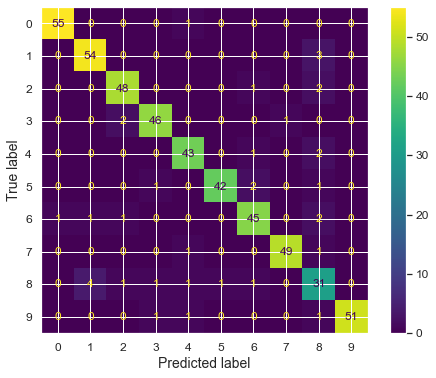

In [20]:
ConfusionMatrixDisplay.from_estimator(pipe, X_te, y_te)
plt.show()